# <center>R2.08 - Outils numériques pour les statistiques descriptives <br>TP3 - "Just One More" Paradox<center>


_Tom Ferragut, Regis Fleurquin, Lucie Naert_

_IUT de Vannes, BUT Informatique_

### Imports

In [1]:
# importation des packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

C:\Users\omerf\AppData\Local\Temp\ipykernel_29028\3439630666.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1 - Échauffement

Avant de s'attaquer au paradoxe "Just One More", voici deux petits exercices d'application des définitions de moyenne et de médiane.

>__Question 1 :__ Dans une cellule Markdown, calculer la moyenne et la médiane de chacune des séries suivantes : 
>- 5, 8, 5, 10, 9, 6, 8, 4, 9
>- 75, 95, 80, 90, 78, 92, 88, 72, 80, 95

- Moyenne = 7.11 ; Médiane = 8
- Moyenne = 84.5 ; Médiane = 84

Moyenne 1 : (5+8+5+10+9+6+8+4+9)/9 = 7.11
Mediane 1 : 8
Moyenne 2 : (75+95+80+90+78+92+88+72+80+95)/10 = 84.5
Mediane 2 : 80

>__Question 2 :__ Dans une cellule Markdown, calculer la moyenne et la médiane de chacun des deux tableaux agrégés suivants.
> ### <center>Tableau 1 : Notes (/20) <center>
>
><table style="width:50%; text-align:center;"; border="10"; bordercolor="red"; align="center">
>  <tr>
>    <th style="text-align:center;">Notes (/20)</th>
>    <th style="text-align:center;">7</th>
>    <th style="text-align:center;">8</th>
>    <th style="text-align:center;">10</th>
>    <th style="text-align:center;">11</th>
>    <th style="text-align:center;">12</th>
>  </tr>
>  <tr>
>    <td style="text-align:center;"><strong>Effectif</strong></td>
>    <td style="text-align:center;">3</td>
>    <td style="text-align:center;">5</td>
>    <td style="text-align:center;">2</td>
>    <td style="text-align:center;">6</td>
>    <td style="text-align:center;">5</td>
>  </tr>
></table>
>    
> ### <center>Tableau 2: Durée (en heures)<center> 
>
><table style="width:100%; text-align:center;" border="10" bordercolor="red" align="center">
>  <tr>
>    <th style="text-align:center;">Durée (en heures)</th>
>    <th style="text-align:center;">$0\leq t < 400$</th>
>    <th style="text-align:center;">$400\leq t < 600$</th>
>    <th style="text-align:center;">$600\leq t < 800$</th>
>    <th style="text-align:center;">$800\leq t < 1000$</th>
>    <th style="text-align:center;">$1000\leq t < 1200$</th>
>    <th style="text-align:center;">$1200\leq t < 1400$</th>
>  </tr>
>  <tr>
>    <td style="text-align:center;"><strong>Nombre d'ampoules</strong></td>
>    <td style="text-align:center;">$1$</td>
>    <td style="text-align:center;">$15$</td>
>    <td style="text-align:center;" style="text-align:center;">$46$</td>
>    <td style="text-align:center;">$63$</td>
>    <td style="text-align:center;">$74$</td>
>    <td style="text-align:center;">$1$</td>
>  </tr>
></table>           



- 1er Tableau : Moyenne = 9.85 ; Médiane = 11 
- 2ème Tableau : Moyenne = 896.5 ; Médiane = 900 

## 2 - "Just One More" Paradox

Jouons à un jeu :
- Vous commencez avec 100€, et jouez à Pile ou Face plusieurs fois d'affilés. 
- À chaque fois que vous obtenez un Pile, vous gagnez $80\%$ de votre cagnotte.
- À chaque fois que vous obtenez Face vous perdez $50\%$ de votre cagnotte.

Une pièce (équilibré) ayant autant de chance d'obtenir Pile ou Face, votre gain moyen est :
$$\text{Gain Moyen}=\left(\frac{1}{2}\times 0,8 - \frac{1}{2} \times 0.5 \right) \text{Cagnotte}=0.15 \times \text{Cagnotte} > 0 !!!$$ 

En moyenne on a donc l'impression que l'on gagne de l'argent ! Joueriez-vous à ce jeu ?

--------------------

Nous allons voir dans ce TP qu'à priori, ce jeu n'est en fait pas avantageux pour le joueur, c'est pour cela que l'on parle de **paradoxe**. 

Ce TP est inspiré de la vidéo Youtube suivante.
- https://youtu.be/_FuuYSM7yOo?si=HBCPLJnIFsoM4prG 

--------------------

L'objectif de ce TP est de générer des lancers de pièces pour simuler une population d'individus jouant à ce jeu, dans le but d'étudier le gain moyen et médian en pratique.




### 2.a - Génération pseudo-aléatoire des données

Pour générer des nombre pseudo-aléatoire nous allons utiliser numpy, plus précisément la méthode `np.random.randint` quand il s'agit d'entiers.

Commençons par générer des lancés de dés, et regroupons ces informations dans un tableau.

>__Question 3 :__ Générer une liste `lances_des` contenant **1000**  entiers aléatoires entre $1$ et $6$. Puis grâce à la commande `pd.DataFrame`, créer un tableau `Lances` contenant ces lancés.

In [2]:
# Création d'un DataFrame avec une colonne contenant les résultats d'un lancé de dés
def lances_des(n):
    return np.random.randint(1, 7, size=n)

lances_des(1000)
Lances = pd.DataFrame({'Lance_de_des': lances_des(1000)})

print(Lances)

     Lance_de_des
0               4
1               3
2               3
3               4
4               6
..            ...
995             2
996             1
997             5
998             2
999             1

[1000 rows x 1 columns]


>__Question 4 :__  Ajouter deux colonnes supplémentaires au Dataframe `Lances`:
>- `Somme_de_deux_des` contenant la somme de deux lancés de dés.
>- `Somme_de_trois_des` contenant la somme de trois lancés de dés.

In [6]:
import pandas as pd
import random

# Générer une liste de 1000 entiers aléatoires entre 1 et 6
lances_des = [random.randint(1, 6) for _ in range(1000)]

# Créer un DataFrame à partir de la liste
Lances = pd.DataFrame(lances_des, columns=['Lancés'])

# Ajouter une colonne contenant la somme de deux lancés de dés
Lances['Somme_de_deux_des'] = Lances['Lancés'].apply(lambda x: random.randint(1, 6) + x)

# Ajouter une colonne contenant la somme de trois lancés de dés
Lances['Somme_de_trois_des'] = Lances.apply(lambda row: row['Lancés'] + random.randint(1, 6) + random.randint(1, 6), axis=1)

# Afficher les 5 premières lignes du DataFrame avec les nouvelles colonnes
print(Lances.head())


   Lancés  Somme_de_deux_des  Somme_de_trois_des
0       6                  9                  10
1       4                 10                   9
2       4                  6                  10
3       2                  8                   5
4       1                  5                   6


>__Question 5 :__ En vous inspirant du TP1, tracer des diagrammes en barre représentant la distribution des valeurs prisent par 1000 lancés de 1 dés, sommes de 2 dés et sommes de 3 dés.

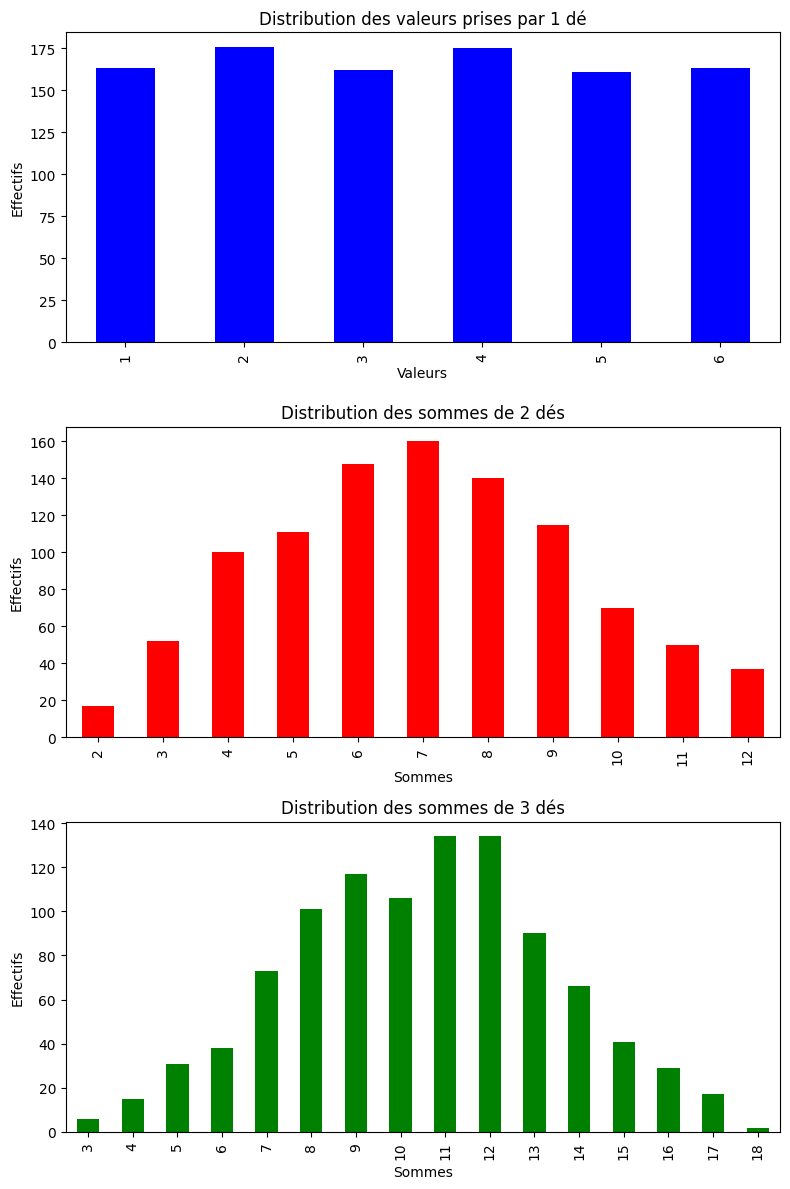

In [7]:
# Générer une liste de 1000 entiers aléatoires entre 1 et 6
lances_des = [random.randint(1, 6) for _ in range(1000)]

# Créer un DataFrame à partir de la liste
Lances = pd.DataFrame(lances_des, columns=['Lancés'])

# Ajouter une colonne contenant la somme de deux lancés de dés
Lances['Somme_de_deux_des'] = Lances['Lancés'].apply(lambda x: random.randint(1, 6) + x)

# Ajouter une colonne contenant la somme de trois lancés de dés
Lances['Somme_de_trois_des'] = Lances.apply(lambda row: row['Lancés'] + random.randint(1, 6) + random.randint(1, 6), axis=1)

# Tracer des diagrammes en barre pour chaque distribution
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Distribution des valeurs prises par 1 dé
Lances['Lancés'].value_counts().sort_index().plot(kind="bar", color='blue', ax=axs[0])
axs[0].set_xlabel('Valeurs')
axs[0].set_ylabel('Effectifs')
axs[0].set_title('Distribution des valeurs prises par 1 dé')

# Distribution des sommes de 2 dés
Lances['Somme_de_deux_des'].value_counts().sort_index().plot(kind="bar", color='red', ax=axs[1])
axs[1].set_xlabel('Sommes')
axs[1].set_ylabel('Effectifs')
axs[1].set_title('Distribution des sommes de 2 dés')

# Distribution des sommes de 3 dés
Lances['Somme_de_trois_des'].value_counts().sort_index().plot(kind="bar", color='green', ax=axs[2])
axs[2].set_xlabel('Sommes')
axs[2].set_ylabel('Effectifs')
axs[2].set_title('Distribution des sommes de 3 dés')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


La distribution des valeurs se rapproche de plus en plus d'une Gaussienne ! Cette distribution très particulière est celle qui apparaît "le plus" dans des événements aléatoire.

### 2.b - Simulation et étude du paradoxe

Nous pouvons à présent simuler des joueurs. Nous modéliserons les lancer de pièces par un nombre aléatoire : $1$ pour Pile et $0$ pour Face.

>__Question 6 :__ Ecrire une fonction `lance_pile_face` prenant en entré le nombre de lancé à réaliser et le nombre d'individu ayant joué, puis qui donne en sorti un tableau contenant pour chaque personne le nombre de fois qu'ils ont obtenu Pile.

In [12]:
import numpy as np

def lance_pile_face(nombre_lances, nombre_individus):
    # Générer un tableau aléatoire de lancers de pièces (1 pour Pile, 0 pour Face)
    lancers = np.random.randint(2, size=(nombre_individus, nombre_lances))
    # Calculer le nombre de fois où chaque individu a obtenu Pile
    nombre_piles = np.sum(lancers, axis=1)
    return nombre_piles

# Exemple d'utilisation de la fonction
nombre_lances = 1000
nombre_individus = 10
resultats = lance_pile_face(nombre_lances, nombre_individus)
print("Résultats des joueurs :", resultats)


Si l'on réalise $l$ lancés de pièces et que l'on obtient $p$ Piles, notre argent devient alors : $cagnotte=100\cdot 1.8^{p} \cdot 0.5^{l-p}$

En utilisant cette formule nous pouvons inclure la cagnotte de chaque individu dans notre tableau.

>__Question 7 :__ Ajouter au Dataframe (construit par `lance_pile_face`) une colonne `cagnotte` contenant l'argent en possession d'un joueur après avoir joué. Puis, calculer la moyenne et la médiane des gains des individus.

In [18]:
import numpy as np
import pandas as pd

def lance_pile_face(nombre_lances, nombre_individus):
    # Générer un tableau aléatoire de lancers de pièces (1 pour Pile, 0 pour Face)
    lancers = np.random.randint(2, size=(nombre_individus, nombre_lances))
    # Calculer le nombre de fois où chaque individu a obtenu Pile
    nombre_piles = np.sum(lancers, axis=1)
    return nombre_piles

def calcul_cagnotte(nombre_piles, nombre_lances):
    # Calcul de la cagnotte pour chaque joueur
    cagnotte = 100 * (1.8 ** nombre_piles) * (0.5 ** (nombre_lances - nombre_piles))
    # Appliquer un seuil minimum de 1€
    cagnotte = np.maximum(cagnotte, 1)
    return cagnotte

# Paramètres de la simulation
nombre_lances = 1000
nombre_individus = 1000

# Génération des résultats des joueurs
resultats = lance_pile_face(nombre_lances, nombre_individus)

# Calcul des cagnottes des joueurs
cagnottes = calcul_cagnotte(resultats, nombre_lances)

# Création du DataFrame contenant les résultats et les cagnottes
df = pd.DataFrame({'Nombre_de_Piles': resultats, 'Cagnotte': cagnottes})

# Calcul de la moyenne et de la médiane des gains des joueurs
moyenne_gains = df['Cagnotte'].mean()
median_gains = df['Cagnotte'].median()

print("Moyenne des gains des individus :", moyenne_gains)
print("Médiane des gains des individus :", median_gains)


Moyenne des gains des individus : 2.4127577400788067
Médiane des gains des individus : 1.0


>__Question 8 :__ La stratégie intitiale à l'air perdante pour le jouer. Essayons une autre stratégie : on mise toujours la même somme de 100€ (et non plus la totalité de notre cagnotte). Calculer le nouveau gain moyen et médian puis commenter.

In [22]:
import numpy as np
import pandas as pd

def lance_pile_face(nombre_lances, nombre_individus):
    # Générer un tableau aléatoire de lancers de pièces (1 pour Pile, 0 pour Face)
    lancers = np.random.randint(2, size=(nombre_individus, nombre_lances))
    # Calculer le nombre de fois où chaque individu a obtenu Pile
    nombre_piles = np.sum(lancers, axis=1)
    return nombre_piles

def calcul_cagnotte_strategie_2(nombre_piles, nombre_lances):
    cagnotte = np.zeros_like(nombre_piles, dtype=float)
    for i in range(len(cagnotte)):
        montant_mise = 100  # Montant de la mise fixe
        for _ in range(nombre_lances):
            if cagnotte[i] >= montant_mise:  # Vérifier si le joueur peut miser
                if np.random.rand() < 0.5:
                    cagnotte[i] -= montant_mise
                else:
                    cagnotte[i] += montant_mise * (1.8 ** nombre_piles[i]) * (0.5 ** (nombre_lances - nombre_piles[i]))
            else:
                break  # Arrêter de jouer si la cagnotte est insuffisante
    return cagnotte

# Paramètres de la simulation
nombre_lances = 1000
nombre_individus = 1000

# Génération des résultats des joueurs
resultats = lance_pile_face(nombre_lances, nombre_individus)

# Calcul des cagnottes des joueurs avec la nouvelle stratégie
cagnottes_strategie_2 = calcul_cagnotte_strategie_2(resultats, nombre_lances)

# Création d'un DataFrame pour les résultats avec la nouvelle stratégie
df_strategie_2 = pd.DataFrame({'Nombre_de_Piles': resultats, 'Cagnotte_Strategie_2': cagnottes_strategie_2})

# Calcul de la moyenne et de la médiane des gains des joueurs avec la nouvelle stratégie
moyenne_gains_strategie_2 = df_strategie_2['Cagnotte_Strategie_2'].mean()
median_gains_strategie_2 = df_strategie_2['Cagnotte_Strategie_2'].median()

print("Nouvelle stratégie :")
print("Moyenne des gains des individus :", moyenne_gains_strategie_2)
print("Médiane des gains des individus :", median_gains_strategie_2)

Nouvelle stratégie :
Moyenne des gains des individus : 0.0
Médiane des gains des individus : 0.0


>__Question 9 : (Bonus)__ Ecrire une fonction qui prend comme paramètres : 
>- Le type de stratégie
>- Les paramètres de gains et de pertes
>- Le nombre d'individus
>- Le nombre de lancés
>
>Et qui trace sur un même graphique :
>- L'évolution de la cagnotte de chaque individus 
>- Lévolution de la moyenne et de la médiane.
>
>Commenter.

In [10]:
def simulation_cagnotte(strategie, gains, pertes, nombre_individus, nombre_lances):
    
    ####TODO####


SyntaxError: incomplete input (280527173.py, line 3)